In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns

from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.api import OLS
import matplotlib.pyplot as plt

In [29]:
CCR_df = pd.read_excel('CCR.xlsx', sheet_name= "normal")
CCR_df['Data'] = pd.to_datetime(CCR_df['Data'])
CCR_df['CCR_diff'] = CCR_df['CCR'].diff()
CCR_df = CCR_df.dropna()
CCR_df

,Data,CCR,LN_CCR,LN_DIFF_CCR,CCR_diff
1,2011-02-28,7.117926,1.962616,-0.067065,-0.493739
2,2011-03-31,7.271329,1.983939,0.021323,0.153404
3,2011-04-29,7.552896,2.021931,0.037992,0.281566
4,2011-05-31,7.613146,2.029876,0.007945,0.060250
5,2011-06-30,7.159837,1.968487,-0.061389,-0.453309
...,...,...,...,...,...
154,2023-11-30,13.540000,2.605648,0.122410,1.560000
155,2023-12-28,14.180000,2.651833,0.046184,0.640000
156,2024-01-31,13.120000,2.574138,-0.077695,-1.060000
157,2024-02-29,13.780000,2.623218,0.049080,0.660000


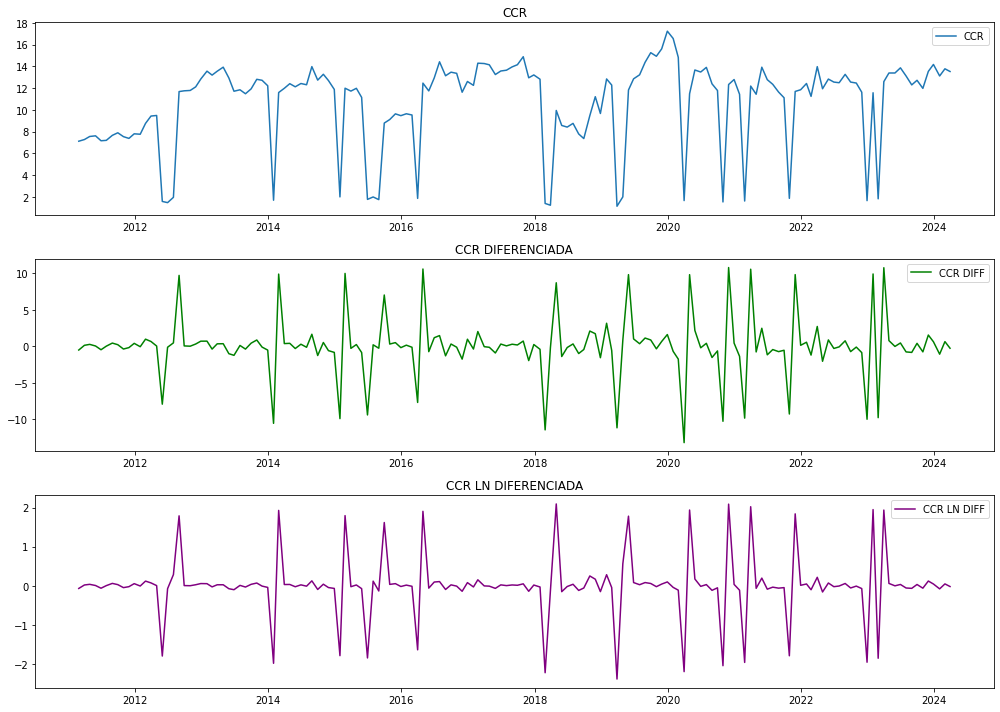

In [30]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(CCR_df['Data'] , CCR_df['CCR'], label='CCR')
plt.title('CCR')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(CCR_df['Data'] ,CCR_df['CCR_diff'], label='CCR DIFF', color='green')
plt.title('CCR DIFERENCIADA')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(CCR_df['Data'] ,CCR_df['LN_DIFF_CCR'], label='CCR LN DIFF', color='purple')
plt.title('CCR LN DIFERENCIADA')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
# Function to perform the ADF test
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
# Apply the ADF test on each series
print("CCR:")
adf_test(CCR_df['CCR'])

print("\nCCR DIFF:")
adf_test(CCR_df['CCR_diff'])

print("\nCCR LN DIFF:")
adf_test(CCR_df['LN_DIFF_CCR'])

CCR:
Results of Dickey-Fuller Test:
Test Statistic                -7.876691e+00
p-value                        4.822867e-12
#Lags Used                     0.000000e+00
Number of Observations Used    1.570000e+02
Critical Value (1%)           -3.472703e+00
Critical Value (5%)           -2.880132e+00
Critical Value (10%)          -2.576683e+00
dtype: float64

CCR DIFF:
Results of Dickey-Fuller Test:
Test Statistic                -8.311884e+00
p-value                        3.769637e-13
#Lags Used                     5.000000e+00
Number of Observations Used    1.520000e+02
Critical Value (1%)           -3.474121e+00
Critical Value (5%)           -2.880750e+00
Critical Value (10%)          -2.577013e+00
dtype: float64

CCR LN DIFF:
Results of Dickey-Fuller Test:
Test Statistic                -6.594975e+00
p-value                        6.962117e-09
#Lags Used                     1.000000e+01
Number of Observations Used    1.470000e+02
Critical Value (1%)           -3.475637e+00
Critical Va

In [32]:
print(CCR_df.info())
print(CCR_df.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         158 non-null    datetime64[ns]
 1   CCR          158 non-null    float64       
 2   LN_CCR       158 non-null    float64       
 3   LN_DIFF_CCR  158 non-null    float64       
 4   CCR_diff     158 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB
None
              CCR      LN_CCR  LN_DIFF_CCR    CCR_diff
count  158.000000  158.000000   158.000000  158.000000
mean    10.703514    2.226625     0.003642    0.037469
std      3.895077    0.666292     0.792171    4.150698
min      1.134193    0.125921    -2.382342  -13.178389
25%      9.441268    2.245089    -0.061088   -0.700922
50%     12.056121    2.489559     0.005289    0.045303
75%     13.184758    2.579059     0.057208    0.672330
max     17.243516    2.847436     2.092154   10.8

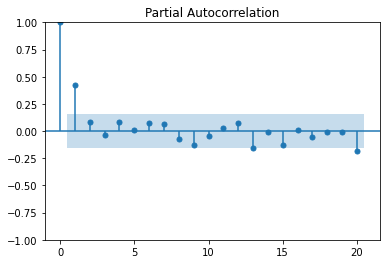

In [33]:
ploct =plot_pacf(CCR_df['CCR'], lags=20, alpha=0.05)


In [34]:
indicadores = pd.read_excel('indicadores.xlsx', sheet_name= "normal")
indicadores['Data'] = pd.to_datetime(indicadores['Data'])
indicadores
indicadores['CAMBIO_diff'] = indicadores['CAMBIO'].diff()
indicadores['IBC-BR_diff'] = indicadores['IBC-BR'].diff()

#criando um dataframe com as variáveis que serão utilizadas
new_df = indicadores.loc[:, ['Data','IPCA', 'CAMBIO_diff', 'IBC-BR_diff', 'SELIC', 'IGP-M','DUMMY']]
new_df = new_df.dropna()
#new_df

#juntando um new_df com o  CCR_df
df = pd.merge(CCR_df, new_df, on='Data')
df

,Data,CCR,LN_CCR,LN_DIFF_CCR,CCR_diff,IPCA,CAMBIO_diff,IBC-BR_diff,SELIC,IGP-M,DUMMY
0,2011-02-28,7.117926,1.962616,-0.067065,-0.493739,0.80,0.00,3.52,0.843905,1.00,0
1,2011-03-31,7.271329,1.983939,0.021323,0.153404,0.79,-0.01,8.75,0.920465,0.62,0
2,2011-04-29,7.552896,2.021931,0.037992,0.281566,0.77,-0.07,-5.04,0.840161,0.45,0
3,2011-05-31,7.613146,2.029876,0.007945,0.060250,0.47,0.02,3.34,0.987988,0.43,0
4,2011-06-30,7.159837,1.968487,-0.061389,-0.453309,0.15,-0.02,-1.48,0.956276,-0.18,0
...,...,...,...,...,...,...,...,...,...,...,...
153,2023-11-30,13.540000,2.605648,0.122410,1.560000,0.28,-0.16,-0.74,0.915991,0.59,0
154,2023-12-28,14.180000,2.651833,0.046184,0.640000,0.56,0.00,-0.23,0.894529,0.74,0
155,2024-01-31,13.120000,2.574138,-0.077695,-1.060000,0.42,0.01,-3.59,0.966696,0.07,0
156,2024-02-29,13.780000,2.623218,0.049080,0.660000,0.83,0.05,3.97,0.800208,-0.52,0


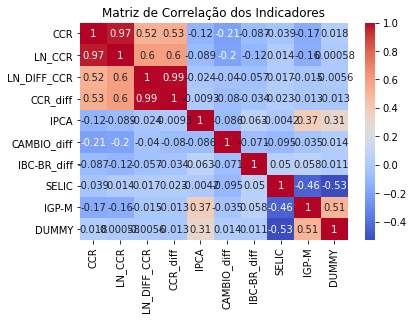

In [35]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação dos Indicadores')
plt.show()

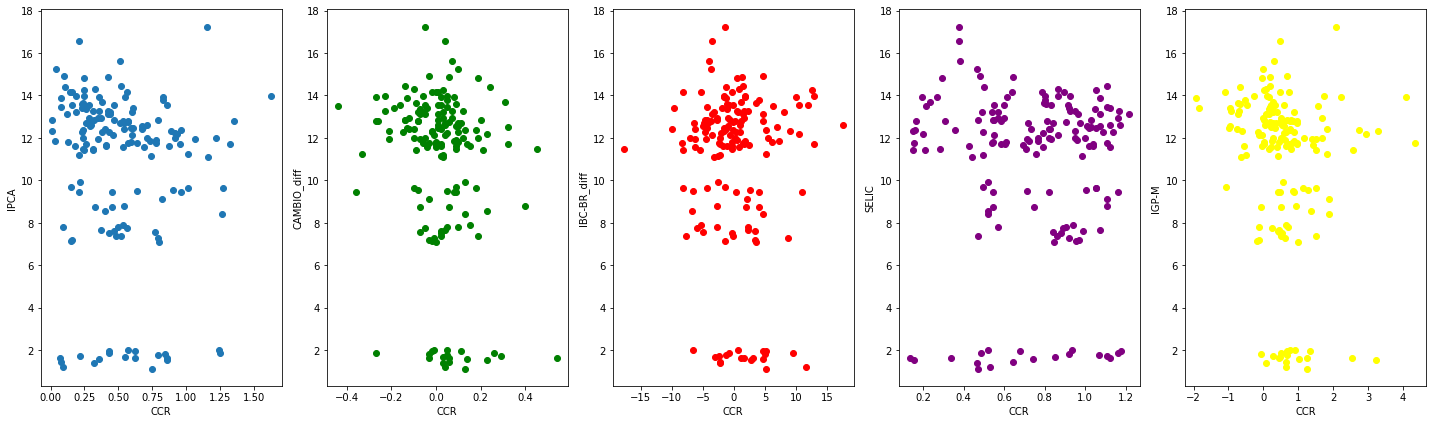

In [36]:
# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

axes[0].scatter( df['IPCA'], df['CCR'])
axes[0].set_xlabel('CCR')
axes[0].set_ylabel('IPCA')

# Scatter plot 2
axes[1].scatter( df['CAMBIO_diff'], df['CCR'], color='green')
axes[1].set_xlabel('CCR')
axes[1].set_ylabel('CAMBIO_diff')

axes[2].scatter(df['IBC-BR_diff'] , df['CCR'], color='red')
axes[2].set_xlabel('CCR')
axes[2].set_ylabel('IBC-BR_diff')

axes[3].scatter( df['SELIC'], df['CCR'], color='purple')
axes[3].set_xlabel('CCR')
axes[3].set_ylabel('SELIC')

axes[4].scatter( df['IGP-M'], df['CCR'], color='yellow')
axes[4].set_xlabel('CCR')
axes[4].set_ylabel('IGP-M')
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [37]:
new_df

,Data,IPCA,CAMBIO_diff,IBC-BR_diff,SELIC,IGP-M,DUMMY
1,2011-02-28,0.80,0.00,3.52,0.843905,1.00,0
2,2011-03-31,0.79,-0.01,8.75,0.920465,0.62,0
3,2011-04-29,0.77,-0.07,-5.04,0.840161,0.45,0
4,2011-05-31,0.47,0.02,3.34,0.987988,0.43,0
5,2011-06-30,0.15,-0.02,-1.48,0.956276,-0.18,0
...,...,...,...,...,...,...,...
154,2023-11-30,0.28,-0.16,-0.74,0.915991,0.59,0
155,2023-12-28,0.56,0.00,-0.23,0.894529,0.74,0
156,2024-01-31,0.42,0.01,-3.59,0.966696,0.07,0
157,2024-02-29,0.83,0.05,3.97,0.800208,-0.52,0


In [38]:
import numpy as np
import pandas as pd

# Função para calcular o ln de um valor
def calculate_ln(value):
    return np.log(value)

# Aplicar a função calculate_ln em todas as colunas, exceto "Data"
new_df.iloc[:, 1:] = new_df.iloc[:, 1:].applymap(calculate_ln)

# Exibir o DataFrame atualizado
print(new_df)

          Data      IPCA  CAMBIO_diff  IBC-BR_diff     SELIC     IGP-M  DUMMY
1   2011-02-28 -0.223144         -inf     1.258461 -0.169715  0.000000   -inf
2   2011-03-31 -0.235722          NaN     2.169054 -0.082876 -0.478036   -inf
3   2011-04-29 -0.261365          NaN          NaN -0.174162 -0.798508   -inf
4   2011-05-31 -0.755023    -3.912023     1.205971 -0.012085 -0.843970   -inf
5   2011-06-30 -1.897120          NaN          NaN -0.044709       NaN   -inf
..         ...       ...          ...          ...       ...       ...    ...
154 2023-11-30 -1.272966          NaN          NaN -0.087749 -0.527633   -inf
155 2023-12-28 -0.579818         -inf          NaN -0.111458 -0.301105   -inf
156 2024-01-31 -0.867501    -4.605170          NaN -0.033872 -2.659260   -inf
157 2024-02-29 -0.186330    -2.995732     1.378766 -0.222884       NaN   -inf
158 2024-03-28 -1.832581    -3.912023     2.353278 -0.184312       NaN   -inf

[158 rows x 7 columns]


<ipython-input-38-c37456fe0e45>:6: RuntimeWarning: divide by zero encountered in log
  return np.log(value)
<ipython-input-38-c37456fe0e45>:6: RuntimeWarning: invalid value encountered in log
  return np.log(value)


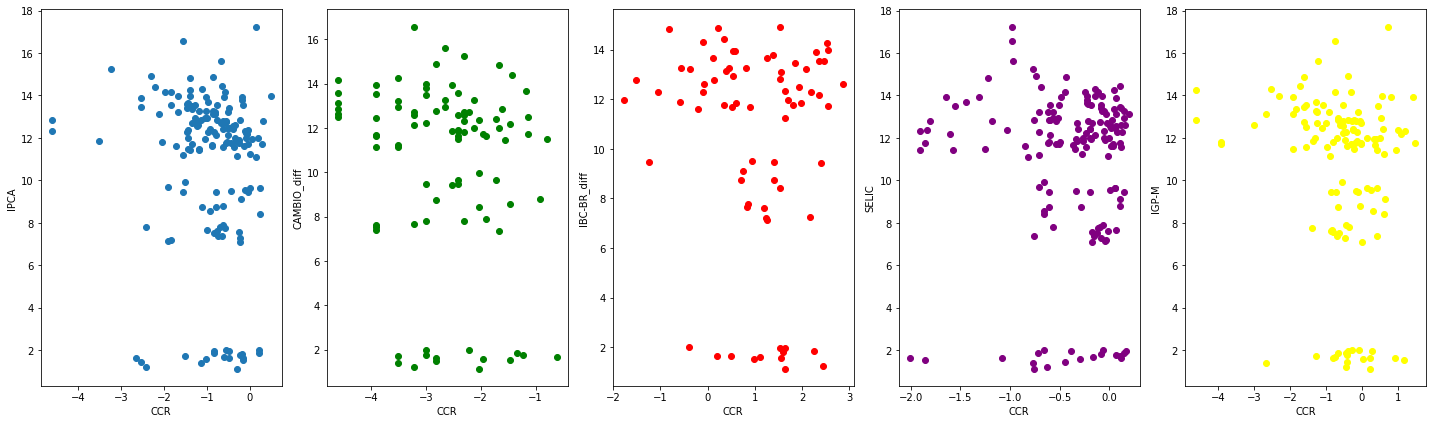

In [39]:
# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

axes[0].scatter( new_df['IPCA'], df['CCR'])
axes[0].set_xlabel('CCR')
axes[0].set_ylabel('IPCA')

# Scatter plot 2
axes[1].scatter( new_df['CAMBIO_diff'], df['CCR'], color='green')
axes[1].set_xlabel('CCR')
axes[1].set_ylabel('CAMBIO_diff')

axes[2].scatter(new_df['IBC-BR_diff'] , df['CCR'], color='red')
axes[2].set_xlabel('CCR')
axes[2].set_ylabel('IBC-BR_diff')

axes[3].scatter( new_df['SELIC'], df['CCR'], color='purple')
axes[3].set_xlabel('CCR')
axes[3].set_ylabel('SELIC')

axes[4].scatter( new_df['IGP-M'], df['CCR'], color='yellow')
axes[4].set_xlabel('CCR')
axes[4].set_ylabel('IGP-M')
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

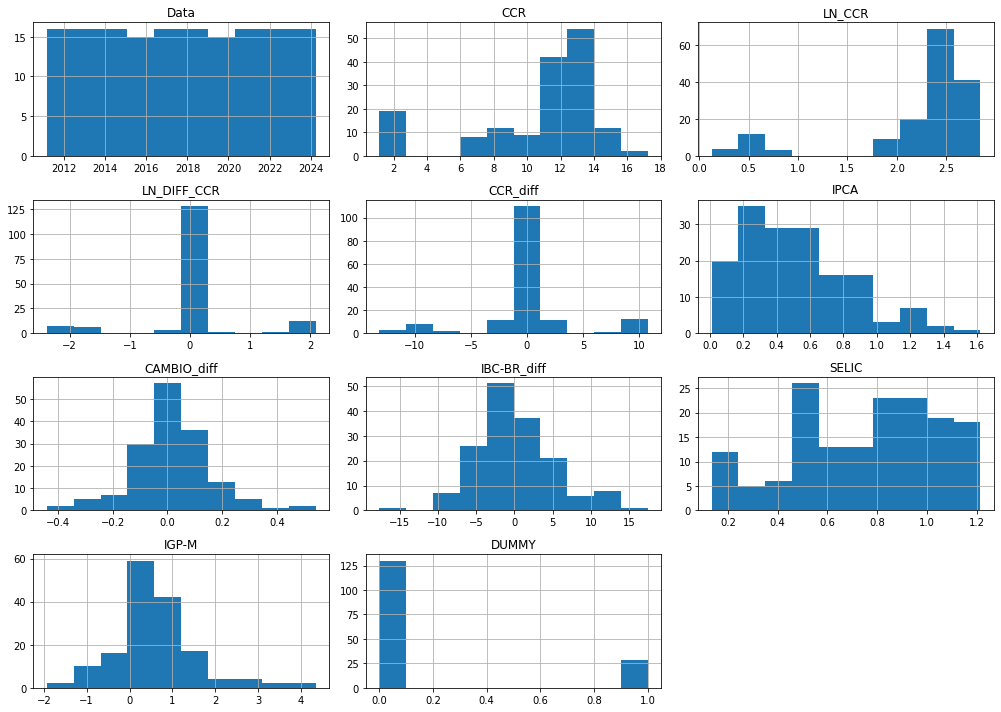

In [40]:
df.hist(figsize=(14, 10))
plt.tight_layout()
plt.show()

O z-score para remoção de outliers foi testado e não teve nenhuma mudança nos dados. 

O teste utilizado foi o de quartil.

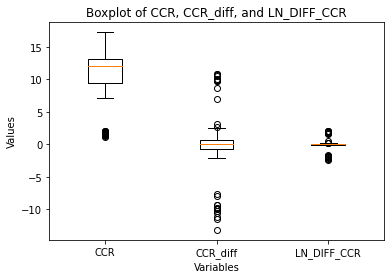

In [41]:
import matplotlib.pyplot as plt

# Create a list of the variables you want to plot
variables = ['CCR', 'CCR_diff', 'LN_DIFF_CCR']

# Create a list of the corresponding data for each variable
data = [df['CCR'], df['CCR_diff'], df['LN_DIFF_CCR']]

# Create the boxplot
plt.boxplot(data, labels=variables)

# Add a title and labels to the plot
plt.title('Boxplot of CCR, CCR_diff, and LN_DIFF_CCR')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

In [43]:
import pandas as pd
#drop the first column of df
df = df.drop(columns=['Data'])
def remove_outliers(df, lower_quantile=0.1, upper_quantile=0.9):
    """
    Remove outliers de um DataFrame utilizando quantis.

    :param df: DataFrame de entrada.
    :param lower_quantile: Limite inferior dos quantis (default: 0.05).
    :param upper_quantile: Limite superior dos quantis (default: 0.95).
    :return: DataFrame sem outliers.
    """
    # Calcula os quantis inferior e superior para cada coluna
    quantiles = df.quantile([lower_quantile, upper_quantile])
    
    # Inicializa uma máscara booleana para todos os valores serem verdadeiros
    mask = pd.Series([True] * len(df))
    
    for col in df.columns:
        # Gera uma máscara para cada coluna, considerando os quantis
        col_mask = (df[col] >= quantiles.loc[lower_quantile, col]) & (df[col] <= quantiles.loc[upper_quantile, col])
        # Combina as máscaras
        mask &= col_mask
    
    # Retorna o DataFrame sem os outliers
    return df[mask]

# Exemplo de uso
# df = pd.read_csv('seu_arquivo.csv')  # Carregar seu DataFrame aqui
# df_sem_outliers = remove_outliers(df)

df_sem_outliers = remove_outliers(df)
df_sem_outliers

,CCR,LN_CCR,LN_DIFF_CCR,CCR_diff,IPCA,CAMBIO_diff,IBC-BR_diff,SELIC,IGP-M,DUMMY
0,7.117926,1.962616,-0.067065,-0.493739,0.80,0.00,3.52,0.843905,1.00,0
2,7.552896,2.021931,0.037992,0.281566,0.77,-0.07,-5.04,0.840161,0.45,0
3,7.613146,2.029876,0.007945,0.060250,0.47,0.02,3.34,0.987988,0.43,0
4,7.159837,1.968487,-0.061389,-0.453309,0.15,-0.02,-1.48,0.956276,-0.18,0
5,7.196835,1.973641,0.005154,0.036998,0.16,-0.03,3.44,0.967883,-0.12,0
6,7.656222,2.035519,0.061877,0.459387,0.37,0.04,2.32,1.074062,0.44,0
7,7.893781,2.066075,0.030557,0.237560,0.53,0.15,-5.21,0.941759,0.65,0
8,7.538164,2.019979,-0.046097,-0.355618,0.43,0.02,-0.28,0.881959,0.53,0
9,7.376493,1.998298,-0.021680,-0.161671,0.52,0.02,-0.15,0.860484,0.50,0
10,7.798215,2.053895,0.055597,0.421722,0.50,0.05,-2.64,0.907338,-0.12,0


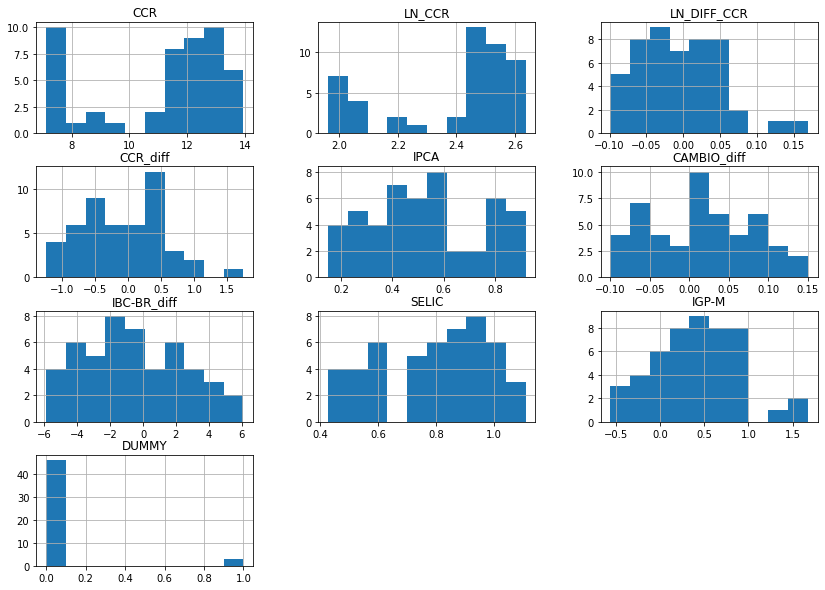

In [44]:
#hist de df
plot = df_sem_outliers.hist(figsize=(14, 10))

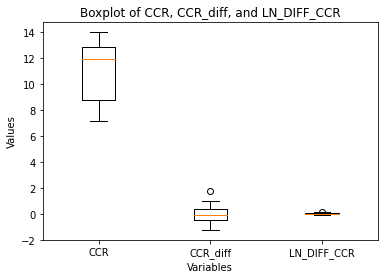

In [ ]:
# Create a list of the variables you want to plot
variables = ['CCR', 'CCR_diff', 'LN_DIFF_CCR']

# Create a list of the corresponding data for each variable
data = [df_sem_outliers['CCR'], df_sem_outliers['CCR_diff'], df_sem_outliers['LN_DIFF_CCR']]

# Create the boxplot
plt.boxplot(data, labels=variables)

# Add a title and labels to the plot
plt.title('Boxplot of CCR, CCR_diff, and LN_DIFF_CCR')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

In [48]:
import statsmodels.api as sm

# Define the independent variables
#X = df[['IPCA', 'CAMBIO_diff', 'SELIC', 'IGP-M', 'DUMMY', 'IBC-BR_diff']]
X = df[['CAMBIO_diff', 'SELIC',  'DUMMY', 'IBC-BR_diff']]
# Add a constant column to the independent variables
#X = sm.add_constant(X)

# Define the dependent variable
y = df['CCR']

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    CCR   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              164.8
Date:                Fri, 21 Jun 2024   Prob (F-statistic):                    1.46e-54
Time:                        14:12:15   Log-Likelihood:                         -477.07
No. Observations:                 158   AIC:                                      962.1
Df Residuals:                     154   BIC:                                      974.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Variável'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

      Variável       VIF
0  CAMBIO_diff  1.018669
1        SELIC  1.061364
2        DUMMY  1.054176
3  IBC-BR_diff  1.007197


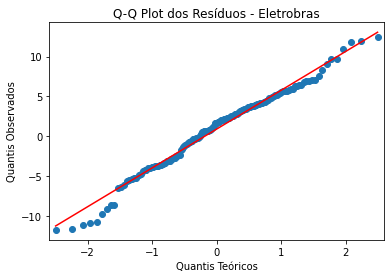

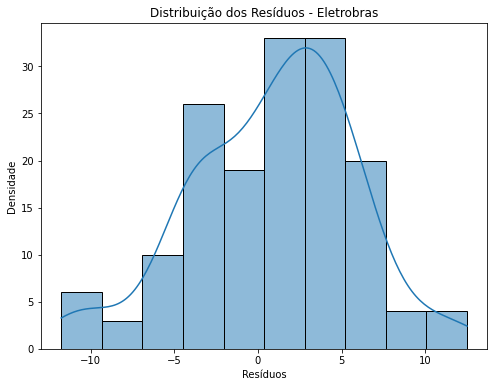

In [ ]:

from statsmodels.graphics.gofplots import qqplot
residuals = results.resid
#qq plot indica se os resíduos são normais quanto mais próximo da linha diagonal
qqplot(residuals, line='s') 
plt.title('Q-Q Plot dos Resíduos - Eletrobras')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Observados')
plt.show()

#histograma para poder visualizar a normalidade melhor
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos - Eletrobras')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.show()

In [ ]:
# Define the independent variables
X = df[['IPCA', 'CAMBIO_diff', 'SELIC', 'DUMMY', 'IGP-M', 'IBC-BR_diff']]
# Add a constant column to the independent variables
#X = sm.add_constant(X)

# Define the dependent variable
y = df['CCR']

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    CCR   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                              109.2
Date:                Wed, 12 Jun 2024   Prob (F-statistic):                    1.58e-52
Time:                        15:43:56   Log-Likelihood:                         -476.63
No. Observations:                 158   AIC:                                      965.3
Df Residuals:                     152   BIC:                                      983.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
def backward_stepwise_selection(X, y, significance_level=0.10, protected_var='DUMMY'):
    initial_features = X.columns.tolist()
    if protected_var and protected_var in initial_features:
        initial_features.remove(protected_var)
    
    while len(initial_features) > 0:
        model = sm.OLS(y, X[[protected_var] + initial_features]).fit()
        p_values = model.pvalues.loc[initial_features]  # Ignorar a constante e a variável protegida
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            initial_features.remove(excluded_feature)
            print(f'Removed feature: {excluded_feature}, p-value: {max_p_value}')
        else:
            break
    return model

In [ ]:
# Define the independent variables
X = df[['IPCA', 'CAMBIO_diff', 'IBC-BR_diff', 'SELIC','IGP-M', 'DUMMY']]

# Add a constant term to the independent variables
#X = sm.add_constant(X)

# Define the dependent variable
y = df['CCR']

# Executar a seleção de variáveis
final_model = backward_stepwise_selection(X, y)

# Imprimir o sumário final
print(final_model.summary())

Removed feature: IPCA, p-value: 0.6711273367648086
Removed feature: IGP-M, p-value: 0.41315976290258194
Removed feature: CAMBIO_diff, p-value: 0.2650858717552613
Removed feature: IBC-BR_diff, p-value: 0.2051215680322115
                                 OLS Regression Results                                
Dep. Variable:                    CCR   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              326.2
Date:                Wed, 12 Jun 2024   Prob (F-statistic):                    1.84e-56
Time:                        15:40:07   Log-Likelihood:                         -478.53
No. Observations:                 158   AIC:                                      961.1
Df Residuals:                     156   BIC:                                      967.2
Df Model:                           2                                       

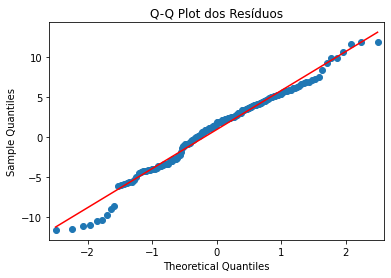

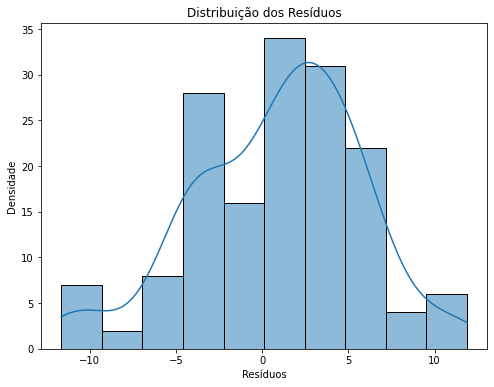

In [ ]:
import statsmodels.api as sm# Get the residuals

from statsmodels.graphics.gofplots import qqplot
residuals = results.resid
#qq plot indica se os resíduos são normais quanto mais próximo da linha diagonal
qqplot(residuals, line='s') 
plt.title('Q-Q Plot dos Resíduos')
plt.show()

#histograma para poder visualizar a normalidade melhor
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.show()


In [50]:
CCRLAG = df['CCR'].shift(2)
IPCA2LAG = df['IPCA'].shift(2)
CAMBIO1LAG = df['CAMBIO_diff'].shift(1)
IBCBR2LAG = df['IBC-BR_diff'].shift(6)
SELICLAG = df['SELIC'].shift(2)
IGPM2LAG = df['IGP-M'].shift(2)

data = pd.DataFrame({'CCRLAG': CCRLAG,
                    'SELICLAG': SELICLAG,
                    'IBCBR2LAG':IBCBR2LAG,
                    'IPCA2LAG': IPCA2LAG,
                    'CAMBIO1LAG' : CAMBIO1LAG,
                    'IGPM2LAG': IGPM2LAG,
                    'DUMMY': df['DUMMY']
                    })
data = data.dropna()

In [63]:
y = data['CCRLAG']
#X = data[['CAMBIO1LAG','DUMMY' , 'IPCA2LAG','SELICLAG', 'IGPM2LAG', 'IBCBR2LAG']]
X = data[['CAMBIO1LAG','DUMMY' ,'SELICLAG', 'IGPM2LAG']] 
X = data[['DUMMY' ,'SELICLAG']] 
#X = sm.add_constant(X)
y=y.values.reshape(-1,1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                              339.9
Date:                Fri, 21 Jun 2024   Prob (F-statistic):                    1.93e-56
Time:                        16:33:08   Log-Likelihood:                         -456.12
No. Observations:                 152   AIC:                                      916.2
Df Residuals:                     150   BIC:                                      922.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

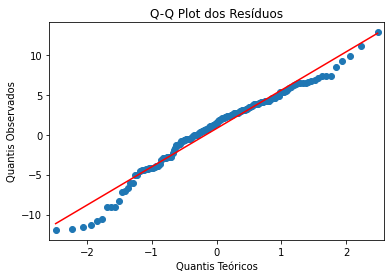

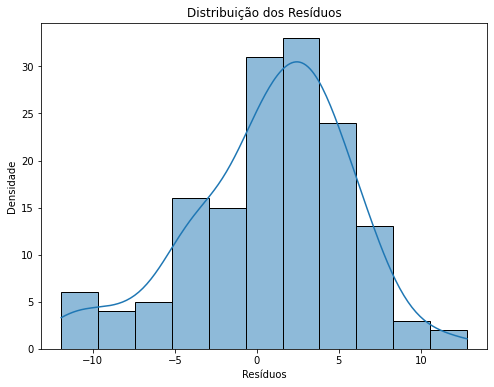

In [64]:
import statsmodels.api as sm# Get the residuals

from statsmodels.graphics.gofplots import qqplot
residuals = results.resid
#qq plot indica se os resíduos são normais quanto mais próximo da linha diagonal
qqplot(residuals, line='s') 
plt.title('Q-Q Plot dos Resíduos')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Observados')
plt.show()

#histograma para poder visualizar a normalidade melhor
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.show()


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Variável'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

   Variável       VIF
0     DUMMY  1.041144
1  SELICLAG  1.041144
